In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

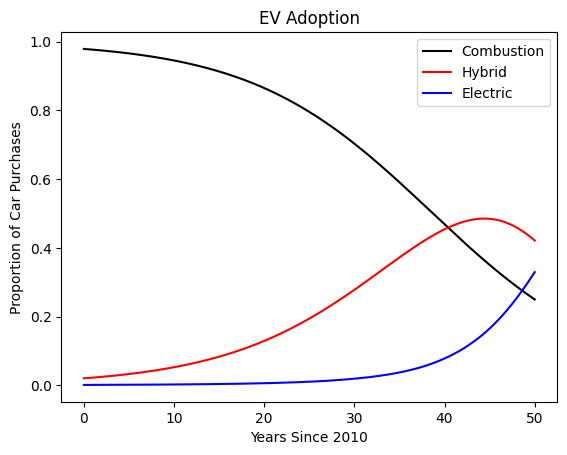

1000
200
Combustion:  0.9455559876994399
Hybrid:  0.05237532732953243
Electric:  0.002068684971027485


In [10]:
# build model
def model(t, cars, ch, he, ec, hc, eh, ce):
    return np.array([-ch*cars[0]*cars[1] - ce*cars[0]*cars[2] + ec*cars[2]*cars[0] + hc*cars[1]*cars[0],
                     ch*cars[0]*cars[1] - hc*cars[1]*cars[0] - he*cars[1]*cars[2] + eh*cars[2]*cars[1],
                     ce*cars[0]*cars[2] + he*cars[1]*cars[2] - eh*cars[2]*cars[1] - ec*cars[2]*cars[0]])

# constants
ch = 0.2 # rate from combustion to hybrid
he = 0.25 # rate from hybrid to electric
ec = 0.01 # rate from electric to combustion
hc = 0.1 # rate from hybrid to combustion
eh = 0.01 # rate from electric to hybrid
ce = 0.1 # rate from combustion to electric

# initial conditions
C = 0.9792
H = 0.02
E = 0.0008

# time points
t0 = 0
tf = 50

# solve ODE
sol = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce), t_eval=np.linspace(t0, tf, 1000))

# plot
plt.plot(sol.t, sol.y[0], label="Combustion", c="k")
plt.plot(sol.t, sol.y[1], label="Hybrid", c="r")
plt.plot(sol.t, sol.y[2], label="Electric", c="b")
plt.title("EV Adoption")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.show()

# print values at t=10
print(len(sol.y[0]))
year = 2020
time = int((year - 2010) * 1000 / 50)
print(time)
print("Combustion: ", sol.y[0][time])
print("Hybrid: ", sol.y[1][time])
print("Electric: ", sol.y[2][time])